# The Import of Necessary Libraries for the Application

In [2]:
"""

andas (pd): pandas is a Python library used for data manipulation and analysis. 
It supports reading and writing data in different formats such as CSV, Excel, and SQL.

matplotlib.pyplot (plt): matplotlib.pyplot is a library used for data visualization. 
It is used to create various types of plots such as graphs, histograms, line plots, scatter plots, etc.

seaborn (sbn): Seaborn is a Python library for data visualization. 
It is based on Matplotlib and provides a high-level interface for creating aesthetic and easy-to-use graphics. 
It is particularly powerful for statistical data visualization and can work directly with DataFrames.

sklearn: scikit-learn is an open-source machine learning library available in Python. 
It provides functionalities for model training, model evaluation, data processing, and many other machine learning tasks.

xgboost (xgb): XGBoost (Extreme Gradient Boosting) is a tree-based machine learning algorithm. 
This algorithm is particularly used for regression and classification problems.
It is known for its ability to make fast and efficient predictions.


"""
import numpy as np
import pandas as pd # Used for data processing, reading and writing CSV files.
import matplotlib.pyplot as plt # Used for data visualization.
import seaborn as sbn # A tool used for statistical data visualization, based on Matplotlib, providing aesthetically pleasing and easy-to-use graphics.
from sklearn import preprocessing # A library required for data preprocessing operations.

import xgboost as xgb # A necessary library for using the XGBoost algorithm.
from xgboost import XGBRegressor # A necessary class for using the XGBoost algorithm.
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # Libraries required for tasks such as splitting training and test sets, hyperparameter optimization, and cross-validation.
from sklearn.metrics import mean_squared_error, r2_score # Metrics required for evaluating model performance.
from sklearn import model_selection # A library necessary for creating machine learning models.




# Volkswagen Car Price Prediction

## 1. Dataset Selection
The dataset has been taken from Kaggle.

In [3]:

"""
DataFrame is a 2D data structure in the pandas library. It is used to store and manipulate data in tabular form.
DataFrames represent data tables arranged in rows and columns.
We read the data as a DataFrame and assign it to the variable 'dataFrame'.
This DataFrame contains the features of VW vehicles.
We used the "read_csv" function to specify the file path.
After reading the data, we assigned the DataFrame to the variable 'dataFrame'.
Now, we can analyze the data and train models using it.
"""

# We read the data from a file named "vw.csv" obtained from Kaggle and load it into a DataFrame.
dataFrame = pd.read_csv("vw.csv") 
dataFrame

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


## 2. Exploratory Data Analysis(EDA)
* Exploratory Data Analysis (EDA) is a method used to better understand a dataset and discover patterns, relationships, and trends within it. The basic steps of Exploratory Data Analysis (EDA) are:

  1.Understanding the Dataset

  2.Examining Data Features

  3.Investigating Missing Values

  4.Visualizing Data Distributions

  5.Exploring Relationships Between Variables

  6.Exploring Significant Subgroups and Segments
  
  7.Identifying Significant Variables

In [4]:
# The head function displays the first 5 rows and columns of the DataFrame.
dataFrame.head() # Let's examine the first 5 data in our dataset.

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [5]:
# The 'sample' function provides 20 random samples.
dataFrame.sample(20) # Let's examine 20 random samples from our dataset.

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4588,Golf,2019,26989,Automatic,8670,Petrol,145,32.8,2.0
12959,Up,2019,9890,Manual,10,Petrol,145,54.3,1.0
9738,Polo,2018,12260,Manual,5070,Petrol,150,64.2,1.0
11677,Tiguan,2017,16425,Automatic,36851,Diesel,145,57.6,2.0
2279,Golf,2015,13552,Semi-Auto,72753,Diesel,30,62.8,2.0
12226,Up,2017,6390,Manual,44539,Petrol,20,64.2,1.0
10847,Tiguan,2016,18001,Manual,10753,Petrol,145,48.7,1.4
12264,Up,2013,4750,Manual,40211,Petrol,20,62.8,1.0
13671,Touareg,2019,48990,Automatic,6125,Diesel,145,34.0,3.0
15136,Caddy,2015,12490,Manual,54641,Diesel,265,60.1,2.0


In [6]:
"""
The describe() method generates a statistical summary of numerical data within a DataFrame or Series. 
This summary includes the count, mean, standard deviation (std), minimum value (min), quartiles, median, and maximum value (max) of numerical data in a specific column (or the entire DataFrame).
These details provide an overview of the general distribution and central tendency of the dataset.

"""
# To view the statistical summary of each feature in a more readable format, we are taking the transpose of the statistical summary of the dataset.
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
year,15157.0,2017.255789,2.053059,2000.0,2016.0,2017.0,2019.0,2020.0
price,15157.0,16838.952365,7755.015206,899.0,10990.0,15497.0,20998.0,69994.0
mileage,15157.0,22092.785644,21148.941635,1.0,5962.0,16393.0,31824.0,212000.0
tax,15157.0,112.744277,63.482617,0.0,30.0,145.0,145.0,580.0
mpg,15157.0,53.753355,13.642182,0.3,46.3,53.3,60.1,188.3
engineSize,15157.0,1.600693,0.461695,0.0,1.2,1.6,2.0,3.2


In [7]:
"""
This method provides a concise summary of the DataFrame including the number of non-null 
entries and data types of each column, which can be useful for understanding 
the structure and completeness of the dataset.

"""
dataFrame.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [8]:
"""
This method counts the number of missing values (NaN) in each column of the DataFrame, 
helping us identify which columns have missing data.


Let's examine how many missing values and in which features we have in our dataset. 
Then, let's brainstorm some methods to handle these missing values.
"""

dataFrame.isnull().sum()

# As seen, there are no missing values in our dataset.

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

#### Let's examine the features in our dataset one by one.

1. Model

In [9]:
"""
The unique() method returns the unique values within a Series.

"""
# Let's examine the unique values in the 'model' column to see which car models are present in our dataset.
dataFrame.model.unique()

array([' T-Roc', ' Golf', ' Passat', ' T-Cross', ' Polo', ' Tiguan',
       ' Sharan', ' Up', ' Scirocco', ' Beetle', ' Caddy Maxi Life',
       ' Caravelle', ' Touareg', ' Arteon', ' Touran', ' Golf SV',
       ' Amarok', ' Tiguan Allspace', ' Shuttle', ' Jetta', ' CC',
       ' California', ' Caddy Life', ' Caddy', ' Caddy Maxi', ' Eos',
       ' Fox'], dtype=object)

In [10]:
"""
The `value_counts()` function calculates the number of unique values in a Series.
This function is particularly useful for computing the frequency of unique categories in a categorical variable.
The result is returned as a Series containing how many times each unique value is observed, indicating which categories are more common in the dataset. 
This information provides a significant insight into the distribution of the dataset.

"""
# To gain insight into the distribution of the 'model' column, let's examine the number of unique values in the 'model' column and the count of each unique model.
dataFrame.model.value_counts()

model
Golf               4863
Polo               3287
Tiguan             1765
Passat              915
Up                  884
T-Roc               733
Touareg             363
Touran              352
T-Cross             300
Golf SV             268
Sharan              260
Arteon              248
Scirocco            242
Amarok              111
Caravelle           101
CC                   95
Tiguan Allspace      91
Beetle               83
Shuttle              61
Caddy Maxi Life      59
Jetta                32
California           15
Caddy Life            8
Eos                   7
Caddy                 6
Caddy Maxi            4
Fox                   4
Name: count, dtype: int64

In [11]:
# Let's look at the statistical summary of the 'model' column to examine the distribution and central tendency of the model column.
dataFrame.model.describe()

count     15157
unique       27
top        Golf
freq       4863
Name: model, dtype: object

2. Year

In [12]:
# Let's examine the unique values in the 'year' column to see which years the cars in our dataset belong to.
dataFrame.year.unique()

array([2019, 2020, 2018, 2017, 2015, 2016, 2013, 2014, 2009, 2010, 2004,
       2003, 2012, 2011, 2008, 2000, 2006, 2002, 2005, 2007, 2001],
      dtype=int64)

In [13]:
# To understand the distribution of vehicles by years, let's examine the number of unique values in the 'year' column and the distribution of vehicles in our dataset for each year.
dataFrame.year.value_counts()

year
2019    4669
2017    2947
2016    2647
2018    1509
2015    1153
2020    1046
2014     580
2013     315
2012      80
2011      57
2010      41
2009      31
2008      27
2007      20
2006      16
2005       8
2001       4
2004       3
2003       2
2002       1
2000       1
Name: count, dtype: int64

In [14]:
# Let's look at the statistical summary of the 'year' column to examine the distribution and central tendency of the year column.
dataFrame.year.describe()

count    15157.000000
mean      2017.255789
std          2.053059
min       2000.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64

3. fuelType

In [15]:
# Let's look at the unique values in the 'fuelType' column to examine all the different fuel types used by the vehicles in the dataset.
dataFrame.fuelType.unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid'], dtype=object)

In [16]:
# Let's examine the frequency of each unique value in the 'fuelType' column to understand the distribution of fuel types among the vehicles in the dataset.
dataFrame.fuelType.value_counts()

fuelType
Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: count, dtype: int64

In [17]:
# To understand the types of fuels used by the cars in the dataset, let's examine the statistical summary of the 'fuelType' column.
dataFrame.fuelType.describe()

count      15157
unique         4
top       Petrol
freq        8553
Name: fuelType, dtype: object

<Axes: ylabel='fuelType'>

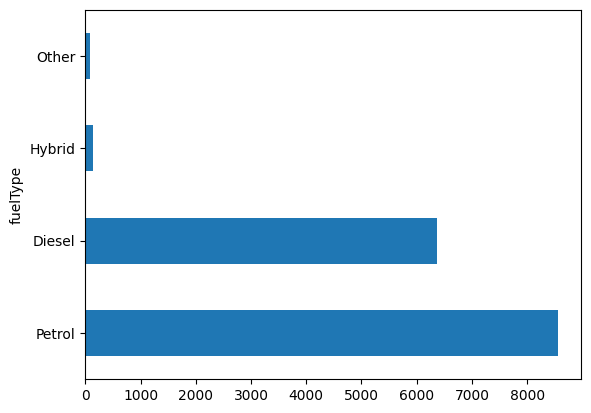

In [18]:
"""
The plot.barh() method is used to draw horizontal bar plots. These types of plots are useful for visualizing the distribution of categorical data.

"""

# Let's analyze the horizontal bar chart to gather information about the types of fuels used by the vehicles in our dataset and try to understand the trends in fuel usage.
dataFrame.fuelType.value_counts().plot.barh()

Text(0, 0.5, 'Fuel Type')

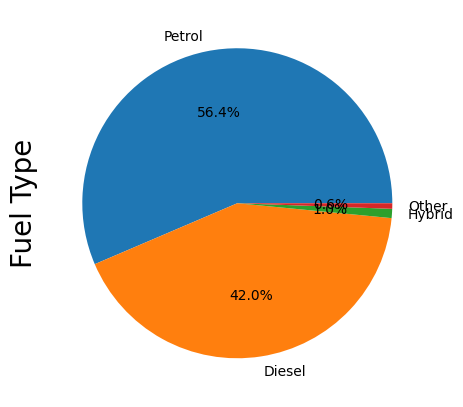

In [19]:
"""
fig = plt.figure(figsize=(5,15)):
This line creates a new figure object using plt.figure(). 
The figsize argument sets the width and height of the figure in inches. 
Here, it's set to (5, 15), making the chart tall and narrow.

dataFrame.fuelType.value_counts().plot(kind='pie', autopct='%.1f%%'):
This line generates the pie chart using the plot() method on the value_counts() Series.
kind='pie' specifies the chart type as a pie chart.
autopct='%.1f%%' sets the format for displaying percentages on each pie slice. It shows percentages with one decimal place.

plt.ylabel("Yakıt Tipi", fontsize=20):
This line sets the label of the y-axis (representing fuel types) as "Yakıt Tipi".
fontsize=20 makes the label text 20 points in size for better readability.

"""


# Let's quickly grasp the relative popularity of different fuel types among the vehicles in our dataset by analyzing the pie chart.
fig = plt.figure(figsize=(5,15))
dataFrame.fuelType.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.ylabel("Fuel Type", fontsize=20)

4. Trasnmission

In [20]:
# Let's examine the unique values in the 'transmission' column to see which transmission types are used by the cars in our dataset.
dataFrame.transmission.unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [21]:
# To understand the distribution of transmission types among vehicles in our dataset, let's examine the frequency of each unique value in the 'transmission' column.
dataFrame.transmission.value_counts()

transmission
Manual       9417
Semi-Auto    3780
Automatic    1960
Name: count, dtype: int64

In [22]:
# To understand the transmission types of vehicles in our dataset, let's examine the statistical summary of the 'transmission' column.
dataFrame.transmission.describe()

count      15157
unique         3
top       Manual
freq        9417
Name: transmission, dtype: object

Text(0, 0.5, 'Vites Tipi')

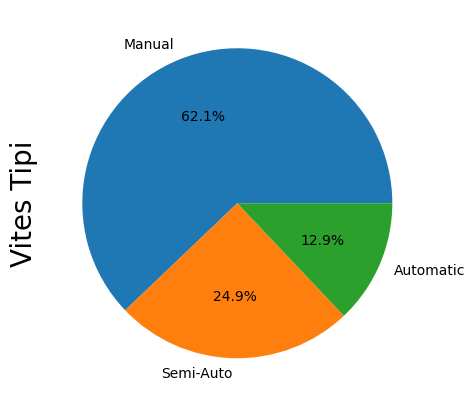

In [23]:
# Let's quickly grasp the relative popularity of the transmission types used by the vehicles in our dataset by analyzing the pie chart.
fig = plt.figure(figsize=(5,15))
dataFrame.transmission.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.ylabel("Vites Tipi", fontsize=20)

5. engineSize

In [24]:
# Let's examine the unique engine sizes present in the dataset to understand which engine sizes are used.
dataFrame.engineSize.unique()

array([2. , 1.5, 1. , 1.6, 0. , 1.4, 3.2, 1.2, 1.9, 1.8, 2.5, 3. ])

In [25]:
# Let's examine the distribution of engine sizes among the vehicles in the dataset to understand which engine size is preferred more.
dataFrame.engineSize.value_counts()

engineSize
2.0    5570
1.0    3121
1.6    1629
1.4    1536
1.5    1446
1.2    1304
3.0     450
1.8      77
0.0      15
1.9       4
2.5       3
3.2       2
Name: count, dtype: int64

In [26]:
# Let's examine the statistical summary of the 'engineSize' column.
dataFrame.engineSize.describe()

count    15157.000000
mean         1.600693
std          0.461695
min          0.000000
25%          1.200000
50%          1.600000
75%          2.000000
max          3.200000
Name: engineSize, dtype: float64

<Axes: ylabel='engineSize'>

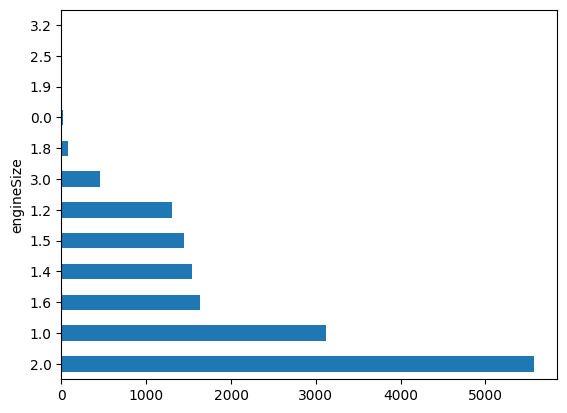

In [27]:
# Let's visualize the distribution of engine sizes among the vehicles in the dataset using a horizontal bar plot to understand which engine size is preferred more.
dataFrame.engineSize.value_counts().plot.barh()

6. Mileage

C:\Users\baha_\AppData\Local\Temp\ipykernel_14596\2145278510.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["mileage"],kde=False, norm_hist=True)


<Axes: xlabel='mileage'>

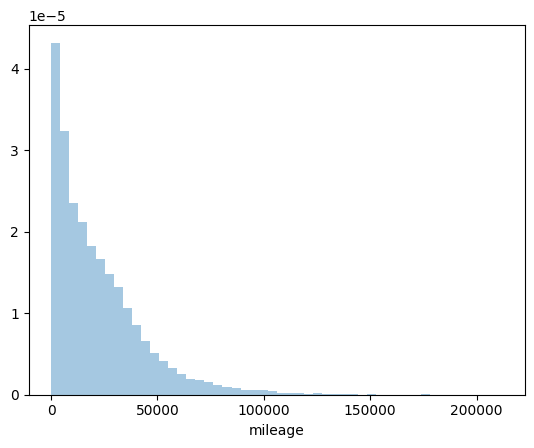

In [28]:
"""
This code generates a distribution plot (histogram) for the "mileage" feature without kernel density estimation (KDE) and with normalized histogram densities. 
This way, we can better understand the distribution of mileage for the vehicles and make better decisions for training

"""
sbn.distplot(dataFrame["mileage"],kde=False, norm_hist=True) 

7. Price

<Axes: ylabel='price'>

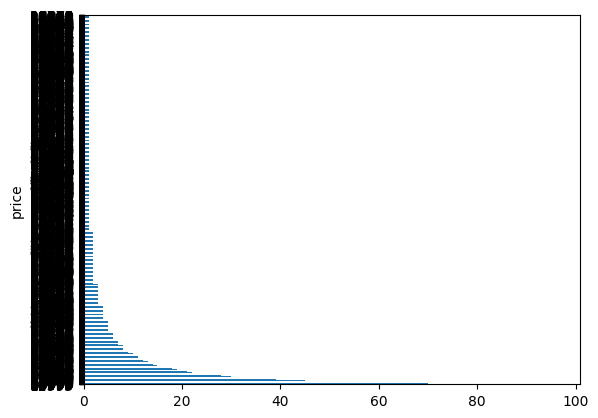

In [29]:
# Let's visualize the distribution of car prices in the dataset using a horizontal bar plot to understand the distribution of car prices.
dataFrame.price.value_counts().plot.barh()

C:\Users\baha_\AppData\Local\Temp\ipykernel_14596\3355493357.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["price"],kde=False, norm_hist=True)


<Axes: xlabel='price'>

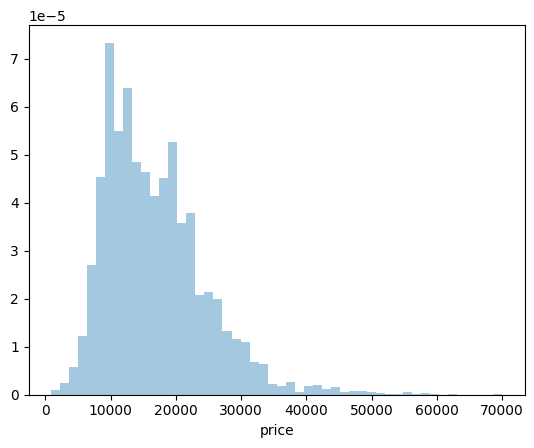

In [30]:
"""
sbn.distplot:
The distplot function from the seaborn library is called to generate the distribution plot.

dataFrame["fiyat"]: This selects a specific column of the dataset you want to visualize.
Here, the "price" column contains car prices, and we want to visualize the distribution of this column.

kde=False: This parameter prevents the display of kernel density estimation (KDE).
In other words, it doesn't draw a density estimate line on the graph.

norm_hist=True: This parameter enables the normalization of histogram densities.
It means the total area will be adjusted to be equal to 1.
"""

# Let's try a different graph to better understand the distribution of prices.
sbn.distplot(dataFrame["price"],kde=False, norm_hist=True) 


<Axes: xlabel='mileage', ylabel='price'>

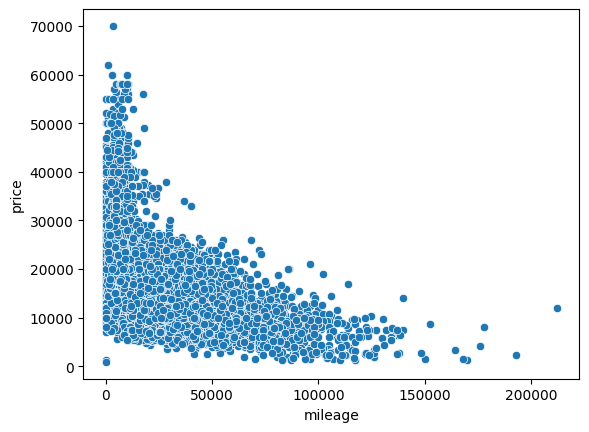

In [31]:
# Let's examine how we can refine our model training by analyzing the price and mileage distribution chart for vehicles.
sbn.scatterplot(x="mileage",y="price",data=dataFrame)


In [32]:
""" 
Let's identify the features that have the data type object. 
To train a better model, we should convert object data types that could be int or float by fixing them.
"The unique method returns unique values, eliminating duplicates."

"""
# Let's examine the features with object data type and brainstorm ideas for data preprocessing for each one, considering what preprocessing steps we can take for each feature.
dataFrame["model"].unique() , dataFrame["transmission"].unique() , dataFrame["fuelType"].unique()

(array([' T-Roc', ' Golf', ' Passat', ' T-Cross', ' Polo', ' Tiguan',
        ' Sharan', ' Up', ' Scirocco', ' Beetle', ' Caddy Maxi Life',
        ' Caravelle', ' Touareg', ' Arteon', ' Touran', ' Golf SV',
        ' Amarok', ' Tiguan Allspace', ' Shuttle', ' Jetta', ' CC',
        ' California', ' Caddy Life', ' Caddy', ' Caddy Maxi', ' Eos',
        ' Fox'], dtype=object),
 array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object),
 array(['Diesel', 'Petrol', 'Other', 'Hybrid'], dtype=object))

## 3. Data Preprocessing
* Data preprocessing is a crucial step in the machine learning process, involving cleaning, transforming, and preparing raw data to make it suitable for analysis and modeling. It plays a significant role in ensuring the quality, consistency, and relevance of the data used to train and evaluate machine learning models.
 1. Handling Missing Values: To train a strong model, there shouldn't be any missing or null values in the dataset, therefore we should eliminate these values by applying various methods. These methods include removing rows or columns with missing values, imputing missing values with mean, median, or mode, or using advanced techniques like interpolation.
 
 2. Data Cleaning: To train a strong model, we should clean the data by removing duplicates, correcting errors, ensuring consistency in formatting, and detecting and removing outliers to improve data quality.
 
 3. Feature Scaling: Feature Scaling is a data preprocessing technique that normalizes the range of features in a dataset. It ensures that all features have a similar scale, preventing any single feature from dominating the model during training. This makes the learning process more efficient and can improve the accuracy of machine learning models.
 
                 * Min-Max Scaling: Scales features to a range between 0 and 1.
                 * Standard Scaling (Z-Score Normalization): Standardizes features by subtracting the mean and dividing by the standard deviation.

 4. Feature Encoding: Feature encoding is a crucial step in data preprocessing for machine learning models. It involves converting categorical or text data into numerical representations that can be understood and processed by machine learning algorithms. Most machine learning algorithms operate on numerical data, while real-world data often contains categorical features like colors, brands, or text descriptions. Feature encoding bridges this gap by transforming these non-numerical features into a format suitable for model training.

                 * One-Hot Encoding: This is a popular technique for categorical features with a fixed number of categories. It creates a new binary feature for each category, where 1 indicates the presence of that category and 0 indicates its absence. This creates a sparse representation of the data, which can be computationally expensive for models with high-dimensional data.
                 * Label Encoding: This assigns a unique integer value to each category. While simpler than one-hot encoding, it assumes an inherent order between the categories, which may not always be true.

 5. Feature Engineering: Feature engineering is an essential step in the machine learning workflow that involves transforming raw data into features suitable for model training. It goes beyond simply cleaning and preparing the data; it actively creates new features that can enhance the model's ability to learn and predict.


In [33]:
"""
In the EDA phase, we need to transform the structures we discovered so that our model can process and understand them.
First, we should convert categorical values into numerical ones for the model to comprehend and process.
There are two methods for this: 1. One-Hot Encoding and 2. Label Encoding.
The choice of method will depend on the distribution of categorical types, as explained above.

Since there are more than two different values in the 'model' column, we should apply the Label Encoding method.
Label encoding is used to convert categorical data into numerical values. 
It assigns a unique numerical value to each category in a categorical feature, thereby allowing machine learning algorithms to understand and process these values. 
Since machine learning algorithms typically work with numerical data, categorical data needs to be converted into numerical values for processing. 
"""

# Let's create an encoding object for encoding categorical data.
LabelEncoder=preprocessing.LabelEncoder()

In [34]:
"""
df["model"] = le.fit_transform(df["model"]).astype('int64'): 
This is the core line that performs label encoding.

le.fit_transform(df["model"]):
This part applies the LabelEncoder object to the "model" column of the DataFrame. 
It fits the encoder to the categories present in the column and then transforms the categorical values into numerical representations.

.astype('int64'):
This converts the resulting numerical values to the integer data type (int64) to ensure they are stored efficiently in the DataFrame.

"""

# Let's label encode our 'model' column to prepare it for machine learning and put it into the appropriate format.
dataFrame["model"] = LabelEncoder.fit_transform(dataFrame.model).astype('int64')

In [35]:
# The .classes_ function allows us to see the data we have tag encoded.
listCarModel =LabelEncoder.classes_ 
listCarModel

array([' Amarok', ' Arteon', ' Beetle', ' CC', ' Caddy', ' Caddy Life',
       ' Caddy Maxi', ' Caddy Maxi Life', ' California', ' Caravelle',
       ' Eos', ' Fox', ' Golf', ' Golf SV', ' Jetta', ' Passat', ' Polo',
       ' Scirocco', ' Sharan', ' Shuttle', ' T-Cross', ' T-Roc',
       ' Tiguan', ' Tiguan Allspace', ' Touareg', ' Touran', ' Up'],
      dtype=object)

In [36]:
# After label encoding, let's check the unique values in our "model" column.
dataFrame.model.unique()

array([21, 12, 15, 20, 16, 22, 18, 26, 17,  2,  7,  9, 24,  1, 25, 13,  0,
       23, 19, 14,  3,  8,  5,  4,  6, 10, 11], dtype=int64)

In [37]:
model_mapping = {21: 'Amarok', 12: 'Arteon', 15: 'Beetle', 20: 'CC', 16: 'Caddy', 22: 'Caddy Life',
                18: 'Caddy Maxi', 26: 'Caddy Maxi Life', 17: 'California', 2: 'Caravelle', 7: 'Eos',
                9: 'Fox', 24: 'Golf', 1: 'Golf SV', 25: 'Jetta', 13: 'Passat', 0: 'Polo', 23: 'Scirocco',
                19: 'Sharan', 14: 'Shuttle', 3: 'T-Cross', 8: 'T-Roc', 5: 'Tiguan', 4: 'Tiguan Allspace',
                6: 'Touareg', 10: 'Touran', 11: 'Up'}

In [38]:
# Let's label encode our 'transmission' column to prepare it for machine learning and put it into the appropriate format.
dataFrame["transmission"] = LabelEncoder.fit_transform(dataFrame.transmission).astype('int64')

In [39]:
# The .classes_ function allows us to see the data we have tag encoded.
listTransmission=LabelEncoder.classes_ 
listTransmission

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [40]:
# After label encoding, let's check the unique values in our "transmission" column.
dataFrame.transmission.unique()

array([0, 1, 2], dtype=int64)

In [41]:
transmission_mapping = {0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [42]:
# Let's label encode our 'fuelType' column to prepare it for machine learning and put it into the appropriate format.
dataFrame["fuelType"] = LabelEncoder.fit_transform(dataFrame.fuelType).astype('int64')

In [43]:
# The .classes_ function allows us to see the data we have tag encoded.
listfuelType= LabelEncoder.classes_ 
listfuelType

array(['Diesel', 'Hybrid', 'Other', 'Petrol'], dtype=object)

In [44]:
# After label encoding, let's check the unique values in our "fuelType" column.
dataFrame.fuelType.unique()

array([0, 3, 2, 1], dtype=int64)

In [45]:
fuelType_mapping = {0: 'Diesel', 1: 'Petrol', 2: 'Other', 3: 'Hybrid'}

In [46]:
# Let's check our dataset to verify the correctness of our actions.
dataFrame.head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,21,2019,25000,0,13904,0,145,49.6,2.0
1,21,2019,26883,0,4562,0,145,49.6,2.0
2,21,2019,20000,1,7414,0,145,50.4,2.0
3,21,2019,33492,0,4825,3,145,32.5,2.0
4,21,2019,22900,2,6500,3,150,39.8,1.5
5,21,2020,31895,1,10,3,145,42.2,1.5
6,21,2020,27895,1,10,3,145,42.2,1.5
7,21,2020,39495,2,10,3,145,32.5,2.0
8,21,2019,21995,1,10,3,145,44.1,1.0
9,21,2019,23285,1,10,3,145,42.2,1.5


In [47]:
"""
dataFrame.corr():
This calculates the Pearson correlation coefficient between all numerical columns in the DataFrame dataFrame. 
The resulting DataFrame contains the correlation coefficients between each pair of columns.
["price"]: This extracts the correlation coefficients associated with the "price" column. 
This results in a Series containing the correlation coefficients between "price" and all other numerical columns.


.sort_values(): This sorts the Series containing the correlation coefficients in either ascending or descending order.
By default, it sorts in ascending order (smallest to largest).

Let's try to understand the characteristics most linearly related to the “price” column in our data.
The correlation coefficient values range from -1 to 1, where:
1 indicates a perfect positive linear relationship (as one variable increases, the other also increases proportionally).
0 indicates no linear relationship.
1 indicates a perfect negative linear relationship (as one variable increases, the other decreases proportionally).
"""
dataFrame.corr()["price"].sort_values() 


mileage        -0.517599
mpg            -0.496844
fuelType       -0.233692
model           0.004375
transmission    0.097699
tax             0.482964
engineSize      0.575139
year            0.614748
price           1.000000
Name: price, dtype: float64

Verinin Düzeltilmesi


In [48]:
# I removed the 1% most expensive tool in the first data set to smooth out the roughness of the data set. 15157 x 0.001 = 151.57 so about 152 rows
ninetyNineDf = dataFrame.sort_values("price",ascending=False).iloc[152:] 


In [49]:
# Let's examine what changes the data we extracted caused.
# let's examine the old data set
dataFrame.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,16.079237,2017.255789,16838.952365,1.120077,22092.785644,1.713928,112.744277,53.753355,1.600693
std,5.412990,2.053059,7755.015206,0.603580,21148.941635,1.474370,63.482617,13.642182,0.461695
min,0.000000,2000.000000,899.000000,0.000000,1.000000,0.000000,0.000000,0.300000,0.000000
25%,12.000000,2016.000000,10990.000000,1.000000,5962.000000,0.000000,30.000000,46.300000,1.200000
50%,16.000000,2017.000000,15497.000000,1.000000,16393.000000,3.000000,145.000000,53.300000,1.600000
75%,21.000000,2019.000000,20998.000000,1.000000,31824.000000,3.000000,145.000000,60.100000,2.000000
max,26.000000,2020.000000,69994.000000,2.000000,212000.000000,3.000000,580.000000,188.300000,3.200000


In [50]:
# let's examine the new data set
ninetyNineDf.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,15005.000000,15005.000000,15005.000000,15005.000000,15005.000000,15005.000000,15005.000000,15005.000000,15005.000000
mean,16.067311,2017.235921,16519.772742,1.120693,22263.637721,1.729690,112.279573,53.961593,1.590850
std,5.382937,2.053355,7095.262204,0.598275,21183.852445,1.472027,63.529813,13.549841,0.450755
min,0.000000,2000.000000,899.000000,0.000000,1.000000,0.000000,0.000000,0.300000,0.000000
25%,12.000000,2016.000000,10980.000000,1.000000,6000.000000,0.000000,30.000000,46.300000,1.200000
50%,16.000000,2017.000000,15475.000000,1.000000,16622.000000,3.000000,145.000000,53.300000,1.600000
75%,21.000000,2019.000000,20990.000000,1.000000,32000.000000,3.000000,145.000000,60.100000,2.000000
max,26.000000,2020.000000,42950.000000,2.000000,212000.000000,3.000000,580.000000,188.300000,3.200000


C:\Users\baha_\AppData\Local\Temp\ipykernel_14596\955847086.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(ninetyNineDf ["price"], kde=False, norm_hist=True)


<Axes: xlabel='price'>

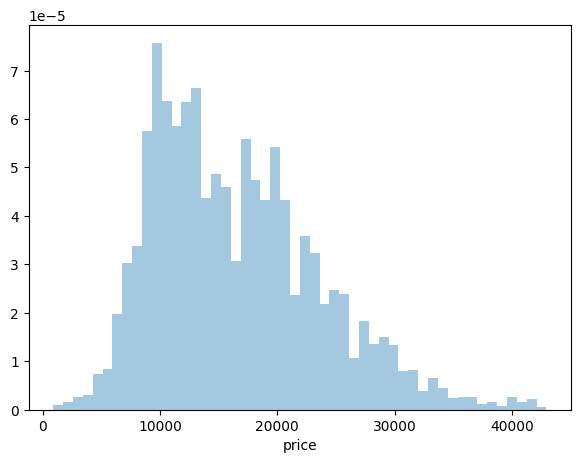

In [51]:
plt.figure(figsize=(7,5))
sbn.distplot(ninetyNineDf ["price"], kde=False, norm_hist=True)
# we can observe that the deviation of the price distribution decreases.

In [52]:
# Price averages of the new dataset by year, no glaring vehicles.
ninetyNineDf.groupby("year").mean()["price"] 


year
2000     1999.000000
2001     2043.500000
2002     1275.000000
2003     6875.000000
2004     1545.666667
2005     3732.375000
2006     3935.562500
2007     3345.650000
2008     3879.851852
2009     4873.258065
2010     4952.658537
2011     7770.491228
2012     7889.637500
2013     8153.647619
2014     9325.896552
2015    11100.346921
2016    12692.361919
2017    14455.086868
2018    17901.725100
2019    21749.370500
2020    22905.511881
Name: price, dtype: float64

In [53]:
# Let's assign the new dataset to the old dataset and remove the deviations so that we can move on to model training.
dataFrame = ninetyNineDf
dataFrame

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13550,24,2019,42950,0,4000,0,145,34.0,3.0
13396,9,2019,42900,2,2544,0,145,32.8,2.0
13844,24,2019,42499,0,6500,0,145,34.0,3.0
13533,24,2019,42498,2,10,0,145,34.5,3.0
13408,9,2019,42495,0,6900,0,145,33.6,2.0
...,...,...,...,...,...,...,...,...,...
13300,2,2001,1295,1,110000,3,200,49.6,1.6
774,12,2004,1287,1,170000,0,165,52.3,2.0
5083,12,2002,1275,1,117000,3,280,35.8,2.0
15155,11,2006,1250,1,82704,3,150,46.3,1.2


In [54]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
model,15005.0,16.067311,5.382937,0.0,12.0,16.0,21.0,26.0
year,15005.0,2017.235921,2.053355,2000.0,2016.0,2017.0,2019.0,2020.0
price,15005.0,16519.772742,7095.262204,899.0,10980.0,15475.0,20990.0,42950.0
transmission,15005.0,1.120693,0.598275,0.0,1.0,1.0,1.0,2.0
mileage,15005.0,22263.637721,21183.852445,1.0,6000.0,16622.0,32000.0,212000.0
fuelType,15005.0,1.729690,1.472027,0.0,0.0,3.0,3.0,3.0
tax,15005.0,112.279573,63.529813,0.0,30.0,145.0,145.0,580.0
mpg,15005.0,53.961593,13.549841,0.3,46.3,53.3,60.1,188.3
engineSize,15005.0,1.590850,0.450755,0.0,1.2,1.6,2.0,3.2


## 4. Model Selection 

In [55]:
"""
In order to select or train our machine learning model, we first need to identify the dependent and independent variables.
We need to separate our price value into price and others, as our price value varies depending on all other values.

X = dataFrame.drop(["price"],axis=1):
This line creates a new DataFrame named X by dropping the "price" column from the original DataFrame dataFrame. 
The axis=1 argument specifies that the column (axis 1) is being dropped. This essentially separates the features (all columns except "price") into a new DataFrame X.

y = dataFrame["price"]: 
This line creates a new Series named y by extracting the "price" column from the original DataFrame dataFrame. 
This isolates the target variable (the variable you want to predict) into a separate Series.

"""
# Let's separate the dependent and independent variables for training.
X = dataFrame.drop(["price"],axis=1)
y = dataFrame["price"]

In [56]:
"""
Separating training and test data is a critical step in developing robust and reliable machine learning models.
This process reduces the risk of model overfitting, avoids bias and allows you to accurately assess the model's ability to generalize.
The process of separating the data set is usually divided into 20%-30% test data and 80%-70% training data.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=144):

This code snippet splits our dataset into training and testing sets using the train_test_split function from scikit-learn.

X_train: This variable holds the features (independent variables) of the training set.
X_test: This variable holds the features (independent variables) of the testing set.
y_train: This variable holds the target (dependent variable) values of the training set.
y_test: This variable holds the target (dependent variable) values of the testing set.

train_test_split(X, y, test_size=0.25, random_state=144): This line performs the actual splitting:
X: The feature matrix containing all features except the target variable.
y: The target vector containing the target values.
test_size=0.25: This specifies that 25% of the data will be allocated to the testing set. The remaining 75% will be used for training.
random_state=144: This sets a random seed for reproducibility. Using the same seed will ensure the same split is generated every time you run the code.
"""

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=144)

In [57]:
# Let's examine the characteristics of the training set.
X_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
12038,18,2019,2,10753,0,145,41.5,2.0
9300,16,2018,1,8555,3,150,64.2,1.0
2554,12,2019,1,5045,3,145,47.1,1.5
7362,16,2017,1,42727,3,20,58.9,1.0
9468,16,2012,1,40122,3,125,51.4,1.2
...,...,...,...,...,...,...,...,...
14842,23,2019,1,39,3,145,36.2,1.5
8441,16,2019,1,3435,3,150,52.3,1.0
2656,12,2016,2,35525,0,30,62.8,2.0
13856,1,2019,0,99,0,145,52.3,2.0


In [58]:
#Let's examine the features of the test set.
X_test

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
4559,12,2019,0,8911,3,150,37.7,2.0
2765,12,2014,1,31834,0,0,74.3,1.6
2813,12,2019,2,2369,3,150,32.8,2.0
5284,12,2014,1,51410,0,20,68.9,2.0
2701,12,2013,1,61520,3,125,53.3,1.4
...,...,...,...,...,...,...,...,...
6959,16,2015,1,37164,3,150,47.0,1.8
8258,16,2016,1,38000,3,20,60.1,1.2
5952,15,2020,1,2000,0,150,57.7,2.0
3969,12,2020,2,3000,3,145,32.8,2.0


In [59]:
# Let's examine the target values of the training set.
y_train

12038    24590
9300     12500
2554     17298
7362      7998
9468      5475
         ...  
14842    26498
8441     15500
2656     17501
13856    26491
13099    12699
Name: price, Length: 11253, dtype: int64

In [60]:
# Let's examine the target variables of the test set.
y_test

4559    27989
2765     8995
2813    28990
5284     9999
2701     7450
        ...  
6959    11995
8258     9052
5952    27000
3969    41990
6370    12850
Name: price, Length: 3752, dtype: int64

## 5. Hyperparameter Optimization
  
* Hyperparameter optimization is a crucial process in machine learning that involves tuning the hyperparameters of a model to achieve the best possible performance on a given task.Hyperparameters are parameters that are set before the learning process begins, and they affect the behavior and performance of the model. Hyperparameter optimization typically involves searching through a predefined hyperparameter space and evaluating the model's performance for each set of hyperparameters. This evaluation is often done using cross-validation, where the dataset is split into multiple subsets, and the model is trained and tested on different combinations of these subsets.
There are various techniques for hyperparameter optimization, including:

   1. Grid Search: This method exhaustively searches through a manually specified subset of the hyperparameter space.
   2. Random Search: This method randomly samples hyperparameters from a predefined distribution and evaluates their performance.
   3. Bayesian Optimization: This method models the objective function (e.g., model accuracy) as a probability distribution and uses Bayesian inference to iteratively select hyperparameters that are likely to improve the model's performance.


In [61]:
""" 
This code fragment performs a Grid Search Cross-Validation to determine the hyperparameters of your XGBoost Regression model. 

params: A dictionary containing different combinations of hyperparameters that should be tested for the Grid Search process.

XGBRegressor: Creates a representative of the XGBoost Regression model.

GridSearchCV: Starts the Grid Search Cross-Validation process. This allows to test hyperparameters over a given range and find the best performing hyperparameters.

cv: Specifies the number of cross-validation coefficients. Here it is set to 10, meaning 10-fold cross-validation will be performed.

n_jobs: Specifies the number of parallel processes. A value of -1 means to use all available processors.

verbose: Specifies the level of detail. A value of 2 means that detailed output is displayed during the process.

fit(): Starts the Grid Search and finds the best parameters.

print(grid.best_params_): Prints the best parameters.
"""
paramS = {
    "colsample_bytree":[0.4,0.5,0.6],
    "learning_rate":[0.01,0.02,0.09],
    "max_depth":[2,3,4,5,6],
    "n_estimators":[100,200,500,2000]
}

xgb = XGBRegressor()
grid = GridSearchCV(xgb,paramS,cv=10,n_jobs=-1,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_params_)


Fitting 10 folds for each of 180 candidates, totalling 1800 fits
{'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 2000}


In [62]:
# Our parameters that we detected in the next step.
best_params = "{'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 2000}"
print("Best params: ",best_params)

Best params:  {'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 2000}


In [63]:
"""
Model Creation:
xgb1 = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.02, max_depth = 6, n_estimators = 2000): This line creates an instance of the XGBRegressor class with specific hyperparameters:

colsample_bytree = 0.5: This parameter controls the fraction of features randomly sampled for splitting at each tree node. A value of 0.5 indicates that 50% of the features are considered for each split.

learning_rate = 0.02: This parameter controls the step size used to update the model during training. A smaller value like 0.02 can help prevent overfitting.

max_depth = 6: This parameter specifies the maximum depth of individual trees in the ensemble. A value of 6 limits the complexity of each tree.

n_estimators = 2000: This parameter defines the number of trees in the ensemble. A value of 2000 indicates that 2000 decision trees will be used in the model.

Model Training:

model_xgb = xgb1.fit(X_train, y_train): This line trains the XGBoost Regression model on the training data (X_train, y_train).
The model learns the relationships between the features in X_train and the target variable y_train.


"""
# Let's train our model using these parameters.
xgb1 = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.02, max_depth = 6, n_estimators = 2000)
model_xgb = xgb1.fit(X_train, y_train)

## 6. Model Evaluation 
 * Model evaluation is done to understand the performance of a trained machine learning model and to assess its accuracy, reliability or effectiveness. Model evaluation attempts to determine how well the model predicts, classifies or comprehends real-world data.




In [64]:
"""
The purpose of predict() is to make predictions on new data using a pre-trained machine learning model.
"""

# Let's perform a prediction on test data
print("Tahminler: ",model_xgb.predict(X_test)[15:20])
print("Gerçek değerler: ", y_test[15:20])


Tahminler:  [12552.607  10151.517  25062.967  22014.924   7939.8916]
Gerçek değerler:  3578     12695
8970     10690
11014    21750
821      23995
7214      7898
Name: price, dtype: int64


In [65]:
"""
The score() method typically calculates a specific metric to assess the model's performance on a given dataset. 
In this case, the default metric used by XGBoost's score() method is the coefficient of determination (R^2).

The score() method takes two arguments:
X_test: The testing feature matrix containing unseen data that the model has not been trained on.
y_test: The testing target vector containing the true values for the target variable in the testing data.

The model applies its predictions to the testing data using the predict() method internally.
The score() method then compares the predicted values with the true values in y_test and calculates the R^2 score.

R^2 Score:
The R^2 score is a common metric used for regression tasks. It measures the proportion of variance in the target variable that can be explained by the model.
A value of 1 indicates a perfect fit, where the model perfectly predicts the target variable. A value closer to 0 indicates a poorer fit.

"""


# Our test score is the success rate of our model, it can be a maximum of 1 (unlikely but possible).

print("Test score: ",model_xgb.score(X_test,y_test))

Test score:  0.9637001307264234


In [66]:
"""

pd.DataFrame: This line imports the DataFrame class from the Pandas library. DataFrames are powerful data structures in Python that allow you to organize and manipulate tabular data efficiently.

The code creates a DataFrame with two main components:
"Importance" Column: This column stores the feature importances obtained from the XGBoost model. Feature importance indicates how much each feature in your training data (X_train) contributed to the model's predictions.
Index: The index of the DataFrame is set to the column names of your training data (X_train.columns). This ensures that each feature importance value is associated with the corresponding feature name.

"""

# We can optimize by examining the importance ranking of the features that our model itself detects.
importance = pd.DataFrame({
    "Importance":model_xgb.feature_importances_},
    index=X_train.columns
    )

print(importance)

              Importance
model           0.088342
year            0.198508
transmission    0.047434
mileage         0.052818
fuelType        0.067591
tax             0.092759
mpg             0.231616
engineSize      0.220933


In [67]:
# Let's examine a subset of the test dataset.
X_test[15:20]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
3578,12,2016,2,41424,3,30,53.3,1.4
8970,16,2017,1,35861,3,150,60.1,1.2
11014,22,2018,2,14446,0,145,40.4,2.0
821,12,2019,2,10,3,145,45.6,1.5
7214,16,2015,1,29768,3,20,60.1,1.0


In [68]:
# Let's examine the target variable values of a subset of the test dataset. 
y_test[15:20]

3578     12695
8970     10690
11014    21750
821      23995
7214      7898
Name: price, dtype: int64

## 7. Prediction

In [261]:
# Let's examine the prediction of our model by entering features.

def predict_car_price(model, year, transmission, mileage, fuelType, tax, mpg, engineSize):
    # Creating a data frame
   
    dataFrame2 = pd.DataFrame({
        'model': [model],
        'year': [year],
        'transmission': [transmission],
        'mileage': [mileage],
        'fuelType': [fuelType],
        'tax': [tax],
        'mpg': [mpg],
        'engineSize': [engineSize]
    })

    # Making predictions
    prediction = model_xgb.predict(dataFrame2)
    
    return prediction[0]

In [262]:

def generate_random_values_predicted_price():
    # Generating random values
    model = np.random.randint(0, 27)  # 0 ile 26 arasında rastgele bir model seçme
    year = np.random.randint(2000, 2021)  # 2000 ile 2020 arasında rastgele bir yıl seçme
    transmission = np.random.randint(0, 3)  # 0 ile 2 arasında rastgele bir şanzıman seçme
    mileage = np.random.randint(1, 212001)  # 1 ile 212000 arasında rastgele bir kilometre seçme
    fuelType = np.random.randint(0, 4)  # 0 ile 3 arasında rastgele bir yakıt türü seçme
    tax = np.random.randint(0, 581)  # 0 ile 580 arasında rastgele bir vergi seçme
    mpg = np.random.uniform(0.3, 188.3)  # 0.3 ile 188.3 arasında rastgele bir yakıt tüketimi seçme
    engineSize = np.random.uniform(0, 3.2)  # 0 ile 3.2 arasında rastgele bir motor hacmi seçme
    # Prediction process
    predicted_price = predict_car_price(model, year, transmission, mileage, fuelType, tax, mpg, engineSize)
    print(predicted_price)

### 8. Insert data into Database

In [273]:
import pandas as pd
import pyodbc
import numpy as np 
import uuid # Random UUID


# Database connection settings
def ConnectionDb():
    conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=BAHAY;'
    'DATABASE=CarPricePrediction;'
    'UID=sa;'
    'PWD=B4b4yorgun.31'
)
    return conn


In [307]:

# Read the CSV file
Cars = pd.read_csv(r"C:\Users\baha_\OneDrive\Belgeler\GitHub\VolkswagenCarPricePredictionMLApplication\vw.csv")

# Create the database connection
connection=ConnectionDb()
cursor = connection.cursor()           

for index, row in Cars.iterrows():
    # Generate a unique ID
    id_value = uuid.uuid4()

    cursor.execute(
            "INSERT INTO dbo.VwCars (ID, model, year, price, transmission, mileage, fuelType, tax, mpg, engineSize) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)",
            id_value, row['model'], row['year'], row['price'], row['transmission'], row['mileage'], row['fuelType'], row['tax'], row['mpg'], row['engineSize']
        )
   

    # Replace null values with None
    for ind, value in row.items():
        if pd.isnull(value):
            row[ind] = None

# Commit the changes and close the connection
connection.commit()
connection.close()

In [304]:

# Read the CSV file
Cars = pd.read_csv(r"C:\Users\baha_\OneDrive\Belgeler\GitHub\VolkswagenCarPricePredictionMLApplication\vw.csv")

# Create the database connection
connection=ConnectionDb()
cursor = connection.cursor()           

for index, row in Cars.iterrows():
    # Generate a unique ID
    id_value = uuid.uuid4()

    # Check for existing data
    cursor.execute(
        "SELECT COUNT(*) FROM dbo.VwCars WHERE model = ? AND year = ? AND price = ? AND transmission = ? AND mileage = ? AND fuelType = ? AND tax = ? AND mpg = ? AND engineSize = ?",
        row['model'], row['year'], row['price'], row['transmission'], row['mileage'], row['fuelType'], row['tax'], row['mpg'], row['engineSize']
    )
    count = cursor.fetchone()[0]

    # If the data doesn't exist, insert it; otherwise, print a message
    if count == 0:
        cursor.execute(
            "INSERT INTO dbo.VwCars (ID, model, year, price, transmission, mileage, fuelType, tax, mpg, engineSize) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)",
            id_value, row['model'], row['year'], row['price'], row['transmission'], row['mileage'], row['fuelType'], row['tax'], row['mpg'], row['engineSize']
        )
    else:
         print(f"Veri zaten mevcut: Model={row['model']}, Year={row['year']}, Price={row['price']}, Transmission={row['transmission']}, Mileage={row['mileage']}, FuelType={row['fuelType']}, Tax={row['tax']}, MPG={row['mpg']}, EngineSize={row['engineSize']}")  

    # Replace null values with None
    for ind, value in row.items():
        if pd.isnull(value):
            row[ind] = None

# Commit the changes and close the connection
connection.commit()
connection.close()

Veri zaten mevcut: Model= T-Roc, Year=2019, Price=25000, Transmission=Automatic, Mileage=13904, FuelType=Diesel, Tax=145, MPG=49.6, EngineSize=2.0
Veri zaten mevcut: Model= T-Roc, Year=2019, Price=26883, Transmission=Automatic, Mileage=4562, FuelType=Diesel, Tax=145, MPG=49.6, EngineSize=2.0
Veri zaten mevcut: Model= T-Roc, Year=2019, Price=20000, Transmission=Manual, Mileage=7414, FuelType=Diesel, Tax=145, MPG=50.4, EngineSize=2.0
Veri zaten mevcut: Model= T-Roc, Year=2019, Price=33492, Transmission=Automatic, Mileage=4825, FuelType=Petrol, Tax=145, MPG=32.5, EngineSize=2.0
Veri zaten mevcut: Model= T-Roc, Year=2019, Price=22900, Transmission=Semi-Auto, Mileage=6500, FuelType=Petrol, Tax=150, MPG=39.8, EngineSize=1.5
Veri zaten mevcut: Model= T-Roc, Year=2020, Price=31895, Transmission=Manual, Mileage=10, FuelType=Petrol, Tax=145, MPG=42.2, EngineSize=1.5
Veri zaten mevcut: Model= T-Roc, Year=2020, Price=27895, Transmission=Manual, Mileage=10, FuelType=Petrol, Tax=145, MPG=42.2, Engin

In [293]:
def insert_data_into_csv_file(model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price):

    data = {
        'model': [model],
        'year': [year],
        'price': [price],
        'transmission': [transmission],
        'mileage': [mileage],
        'fuelType': [fuelType],
        'tax': [tax],
        'mpg': [mpg],
        'engineSize': [engineSize],
    }

    df = pd.DataFrame(data)

    print("Oluşturulan DataFrame:")
    print(df)
    
    csv_file_path = r"C:\Users\baha_\OneDrive\Belgeler\GitHub\VolkswagenCarPricePredictionMLApplication\vw.csv"
    df.to_csv(csv_file_path, sep=',', index=False, header=False, mode='a')  # mode='a' ile append (ekleme) modunda yazma

 
    new_df = pd.read_csv(csv_file_path, sep='\t')
    print("Güncellenmiş CSV Dosyası:")
    print(new_df)


In [306]:

connection=ConnectionDb()
cursor = connection.cursor()

model = np.random.randint(0, 27)  # 0 ile 26 arasında rastgele bir model seçme
year = np.random.randint(2000, 2021)  # 2000 ile 2020 arasında rastgele bir yıl seçme
transmission = np.random.randint(0, 3)  # 0 ile 2 arasında rastgele bir şanzıman seçme
mileage =np.random.randint(1, 212001) # 1 ile 212000 arasında rastgele bir kilometre seçme
fuelType = np.random.randint(0, 4)  # 0 ile 3 arasında rastgele bir yakıt türü seçme
tax =  np.random.randint(0, 581)  # 0 ile 580 arasında rastgele bir vergi seçme
mpg = np.random.randint(0.3, 188.3)  # 0.3 ile 188.3 arasında rastgele bir yakıt tüketimi seçme
engineSize =np.random.randint(0, 3.2)  # 0 ile 3.2 arasında rastgele bir motor hacmi seçme
# Prediction process
price = float(predict_car_price(model, year, transmission, mileage,fuelType, tax, mpg, engineSize))
print(price)

insert_data_into_csv_file(model_mapping[model],year,transmission_mapping[transmission],mileage,fuelType_mapping[fuelType],tax,mpg,engineSize,price)

id_value = uuid.uuid4()
# Add data to a table
cursor.execute('''
    INSERT INTO dbo.VwCars (ID,model, year, transmission, mileage, fuelType, tax, mpg, engineSize, price)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?,?)
''', (id_value,model_mapping[model], year, transmission_mapping[transmission], mileage, fuelType_mapping[fuelType], tax, mpg, engineSize, price))
connection.commit()

print( "model:",model_mapping[model], "year:",year, "transmission:",transmission_mapping[transmission],"mileage:", mileage,"fuelType:", fuelType_mapping[fuelType], "tax:",tax,"mpg:",mpg, "engineSize:",engineSize)
print("Predicted car price:", price)
connection.close()


6266.2783203125
Oluşturulan DataFrame:
    model  year       price transmission  mileage fuelType  tax  mpg  \
0  Arteon  2001  6266.27832    Semi-Auto    56609    Other  124   84   

   engineSize  
0           2  
Güncellenmiş CSV Dosyası:
      model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0       T-Roc,2019,25000,Automatic,13904,Diesel,145,4...               
1       T-Roc,2019,26883,Automatic,4562,Diesel,145,49...               
2       T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0               
3       T-Roc,2019,33492,Automatic,4825,Petrol,145,32...               
4       T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39...               
...                                                  ...               
15153     Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2               
15154     Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4               
15155     Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2               
15156     Fox,2007,2295,Manual,74000,P